In [2]:
!pip install keras
!pip install tensorflow-gpu==2.2

     |████████████████████████████████| 4.4 MB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 43.2 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 50.7 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp38-cp38-linux_x86_64.whl size=44619 sha256=4b2e071a45fd508091da7a64a5892b6a24f017432b295da7df45024fc62ef921
  Stored in directory: /home/hamer/.cache/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c
Successfully built pyyaml
     |████████████████████████████████| 516.3 MB 3.9 kB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 46.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 51.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 49.8 MB/s eta 0:00:01
     |██

In [24]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.8/site-packages (0.23.2)


In [25]:
!pip install pandas

In [26]:
!pip install h5py

In [28]:
!pip install pillow

In [29]:
!pip install scikit-plot

In [23]:
# Importing the Keras libraries and packages
import keras
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dropout, Concatenate
from keras.layers import AveragePooling2D, Input
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Cropping2D

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

from keras.layers.core import Lambda, Flatten, Dense


from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.preprocessing import image

from IPython.display import Image, display
import datetime

from keras.utils import multi_gpu_model

from keras.preprocessing.image import ImageDataGenerator

from os import listdir
import os, random, shutil
from os.path import isfile, join
from IPython.display import Image, display , clear_output
import time

import pandas as pd

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.models import load_model

from IPython.display import Image, display , clear_output

In [9]:
import sys
import numpy as np
import pandas as pd
# from scipy.misc import imread
import pickle
import os
import matplotlib.pyplot as plt

import keras

import time
from keras.optimizers import SGD

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate,Conv1D
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

from keras.layers import Dropout, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import AveragePooling2D, Input
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Cropping2D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalMaxPooling1D


In [10]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [11]:
batch_size=32


train_datagen = ImageDataGenerator(
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   vertical_flip = True,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(                                 )

training_set = train_datagen.flow_from_directory('data/Florida/day1_full/train/',
                                                 target_size = (400, 225),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory('data/Florida/test_3096/',
                                            target_size = (400, 225),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
test_set2 = test_datagen.flow_from_directory('data/Florida/test_3096/',
                                            target_size = (400, 225),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

# generator= train_datagen.flow_from_directory("train", batch_size=batch_size)
# label_map = (generator.class_indices)

img_height = 225
img_width = 400
dir1= 'data/Florida/day1_full/train/'
# dir2= 'data/Florida/test_1/'
dir2= 'data/Florida/test_3096/'


input_imgen = ImageDataGenerator(#rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   rotation_range=5.,
                                   horizontal_flip = True)

test_imgen = ImageDataGenerator(#rescale = 1./255
                               )


def generate_generator_multiple(generator,dir1, dir2, batch_size, img_height,img_width):
    genX1 = generator.flow_from_directory(dir1,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size
                                         )
    
    genX2 = generator.flow_from_directory(dir2,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size
                                         )
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            yield [X1i[0], X2i[0]], X2i[1]  #Yield both images and their mutual label
            
            
inputgenerator=generate_generator_multiple(generator=input_imgen,
                                           dir1=dir1,
                                           dir2=dir1,
                                           batch_size=batch_size,
                                           img_height=img_height,
                                           img_width=img_width)       
     
testgenerator=generate_generator_multiple(test_imgen,
                                          dir1=dir2,
                                          dir2=dir2,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)  

     
testgenerator1=generate_generator_multiple(test_imgen,
                                          dir1=dir2,
                                          dir2=dir2,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)    

steps_per_epoch =round(len(training_set))
validation_steps =round(len(test_set))
print(steps_per_epoch)
print(validation_steps)

# print(test_set.class_indices)  


Found 32410 images belonging to 2 classes.
Found 3434 images belonging to 4 classes.
Found 3434 images belonging to 4 classes.
1013
108


In [12]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
# #################################
    input_shape=(400, 225, 3)
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    # Initialising the CNN    
    # Convolutional Neural Network
    model = Sequential()

    # Step 1 - Convolution
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Adding a second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Adding a third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Adding a fourth convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    model.add(GlobalMaxPooling2D())

    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
#     keras.utils.plot_model(siamese_net, "multi_input_and_output_model.png", show_shapes=True)
    # return the model
    return siamese_net

In [ ]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
# #################################
    input_shape=(400, 225, 3)
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    encoded_l = (left_input)
    encoded_r = (right_input)
    
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

#     prediction = Dense(1,activation='sigmoid')(L1_distance)


    # Initialising the CNN    
    # Convolutional Neural Network
   # Step 1 - Convolution
    x1= Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(L1_distance)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a second convolutional layer
    x1= Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a third convolutional layer
    x1= Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a fourth convolutional layer
    x1= Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    x1= GlobalMaxPooling2D()(x1)
    x1= Dense(128, activation='relu', kernel_initializer='he_uniform')(x1)
    x1= Dropout(0.5)(x1)
    
    x1=  Dense(1,activation='sigmoid')(x1)

    siamese_net = Model(inputs=[left_input,right_input],outputs=x1)
    
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    keras.utils.plot_model(siamese_net, "high.png", show_shapes=True)
    # return the model
    return siamese_net

In [16]:
def get_siamese_model(input_shape):
    """
    """
    
# #################################
    input_shape=(400, 225, 3)
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    x1 =  concatenate([left_input, right_input])
    
    # Step 1 - Convolution
    x1= Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a second convolutional layer
    x1= Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a third convolutional layer
    x1= Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a fourth convolutional layer
    x1= Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    x1= GlobalMaxPooling2D()(x1)
    x1= Dense(128, activation='relu', kernel_initializer='he_uniform')(x1)
    x1= Dropout(0.5)(x1)

    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction =  Dense(1,activation='sigmoid')(x1)
    
    # Connect the inputs with the outputs
    model = Model(inputs=[left_input,right_input],outputs=prediction)

    return model

In [13]:
model = get_siamese_model((400, 225, 3))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 225, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 400, 225, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128)          423232      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128)          0           sequential[1][0]             

In [14]:
# opt = SGD(lr=0.001, momentum=0.9)
# model.compile(loss="binary_crossentropy",optimizer=opt,metrics = ['accuracy'])

In [15]:
#Model 1
model.load_weights("weights_imported/siamese_4layers_day1_v1-epoch34.h5")

In [ ]:
#Model 2
model.load_weights("weights_imported/Siamese_network_high-embeddings-v2-epoch31.h5")

In [18]:
#Model 3
model.load_weights("weights_imported/two_inputs_high_concatenate-v1-epoch31.h5")

In [16]:
from pathlib import Path

test_samples = []
test_labels = []

# list1 = (os.listdir("data/Florida/test_3096/change/")) 
# # list2 = (os.listdir("data/Florida/test_3096/same/")) 

# list2 = (os.listdir("data/Florida/test_3096/same_337/")) ###############

list1 = (os.listdir("data/Florida/test_set/change/")) 
list2 = (os.listdir("data/Florida/test_set/same/")) 

print(len(list1))
print(len(list2))
count=0
j=0
# while j<675:
while j<64814:


#     testnewset1 = (os.listdir("data/Florida/all_frames/")) ###############
#     testnewset1 = (os.listdir("data/Florida/new_all_frames/")) 
    testnewset1 = (os.listdir("data/Florida/test_set/all_frames/")) 

    testnewset_sorted1 = sorted(testnewset1) 
    res1 = testnewset_sorted1[j] 
#     res1 =Path(f'data/Florida/all_frames/{res1}').stem
#    res1 =Path(f'data/Florida/new_all_frames/{res1}').stem
#     res1 =Path(f'data/Florida/test_set/all_frames/{res1}').stem
    res1 =Path(f'data/Florida/test_set/all_frames/{res1}').stem
    
#     print ("The frame number is : " +  str(res1)) 
#     print ("The frame number is : " +  str(res1),test_labels[j]) 

    test_img_path2= f'data/Florida/test_set/change/{res1}.jpg'
    
    test_samples.append(res1)

#     print(test_img_path2)
    if ( not os.path.isfile(test_img_path2)):
        #same
        label =[0]
        test_labels.append(label)
    else:
#       #change
        label =[1]
        test_labels.append(label)

    print(count)
    count+=1
    clear_output(wait=True)

    j+=1

test_labels = (np.array(test_labels))
# print(len(test_labels))
# print(test_labels)


64813


In [17]:
list = pd.DataFrame(np.column_stack([test_samples,test_labels ]), 
                               columns=['Sample', 'True labels'])
print(list)

                       Sample True labels
0      2010202008000000000001           1
1      2010202008000000000002           0
2      2010202008000000000003           0
3      2010202008000000000004           0
4      2010202008000000000005           0
...                       ...         ...
64809  2010202017000000007196           0
64810  2010202017000000007197           0
64811  2010202017000000007198           0
64812  2010202017000000007199           0
64813  2010202017000000007200           0

[64814 rows x 2 columns]


In [20]:
from os import listdir
import os, random, shutil
from os.path import isfile, join
from IPython.display import Image, display , clear_output
import time
from pathlib import Path

import numpy as np
from random import shuffle

global k

def file():
        j =0

        while j <1:

#             testnewset1 = (os.listdir("data/Florida/all_frames/")) 
#             testnewset1 = (os.listdir("data/Florida/new_all_frames/")) ##########
            testnewset1 = (os.listdir("data/Florida/test_set/all_frames/")) 

            testnewset_sorted1 = sorted(testnewset1) 

            res1 = testnewset_sorted1[k] 
            res2 = testnewset_sorted1[k+1] 


#             res2 =Path(f'data/Florida/all_frames/{res1}').stem
#             res2 =Path(f'data/Florida/new_all_frames/{res1}').stem################################

#             res2 = '%010d' % (int(res2[k]) )

            print ("The frame number is : " +  str(res1)) 
            print ("The frame number is : " +  str(res2)) 


#             test_img_path1 = f"data/Florida/all_frames/{res1}"
#             test_img_path2 = f"data/Florida/all_frames/{res2}.jpg"

#             test_img_path1 = f"data/Florida/new_all_frames/{res1}" #########################
#             test_img_path2 = f"data/Florida/new_all_frames/{res2}" #############################

            test_img_path1 = f"data/Florida/test_set/all_frames/{res1}" #########################
            test_img_path2 = f"data/Florida/test_set/all_frames/{res2}" #############################


            test_image1 = image.load_img(test_img_path1, target_size = (400, 225))
            test_image1 = image.img_to_array(test_image1)
            test_image1 = np.expand_dims(test_image1, axis = 0)

            test_image2 = image.load_img(test_img_path2, target_size = (400, 225))
            test_image2 = image.img_to_array(test_image2)
            test_image2 = np.expand_dims(test_image2, axis = 0)

            j+=1

        return test_image1,test_image2

    
test_all_frames=[]
test_pred_labels=[]
test_pred_labels_with_threshold=[]

k=0
#while k<675:
while k<64814:

    result = model.predict(file(),batch_size=1, verbose=1)
    print(result)
#     preds = [int(np.round(result))]
#     print(preds)
    preds = [float(result)]

    test_pred_labels_with_threshold.append(preds)
    
    
#     result = model.predict(file(),batch_size=1, verbose=1)
#     print(result)
    
#     if result[0][0] > 0.45:
#         prediction = [0]
#     else:
#         prediction = [1]

#     print('prediction')
#     print(prediction)
#     print('rounded prediction')
#     preds = [int(np.round(result))]
#     print(preds)
#     test_pred_labels.append(preds)
#     test_pred_labels_with_threshold.append(prediction)

    
#     list3 = (os.listdir("data/Florida/all_frames/")) 
#     list3 = (os.listdir("data/Florida/new_all_frames/")) 
    list3 = (os.listdir("data/Florida/test_set/all_frames/"))     

    list3 = sorted(list3)
    res3 = list3[k] 
    test_all_frames.append(res3)
    k+=1
    clear_output(wait=True)

# test_pred_labels = (np.array(test_pred_labels))


# print(test_pred_labels)
# print(test_pred_labels_with_threshold)

# list = pd.DataFrame(np.column_stack([test_labels, test_pred_labels_with_threshold]), 
#                                columns=['real labels', 'predicted labels'])
# print(list)

The frame number is : 2010202008000000000275.jpg
The frame number is : 2010202008000000000276.jpg


OSError: [Errno 5] Input/output error: 'data/Florida/test_set/all_frames/2010202008000000000275.jpg'

In [ ]:
test_pred_labels_with_threshold = (np.array(test_pred_labels_with_threshold))
print(len(test_pred_labels_with_threshold))
print(test_pred_labels_with_threshold)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

test_response = test_labels
scores = test_pred_labels_with_threshold

fpr, tpr, thresholds = roc_curve(test_response, scores)
roc_auc = roc_auc_score(test_response, scores)
print("AUC of ROC Curve:", roc_auc)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [28]:
from os import listdir
import os, random, shutil
from os.path import isfile, join
from IPython.display import Image, display , clear_output
import time
from pathlib import Path

import numpy as np
from random import shuffle

global k

def file():
        j =0

        while j <1:

            testnewset1 = (os.listdir("data/Florida/all_frames/")) 

            testnewset_sorted1 = sorted(testnewset1) 

            res1 = testnewset_sorted1[k] 

            res2 =Path(f'data/Florida/all_frames/{res1}').stem
            res2 = '%010d' % (int(res2)+4 )

            print ("The frame number is : " +  str(res1)) 
            print ("The frame number is : " +  str(res2)+".jpg") 


            test_img_path1 = f"data/Florida/all_frames/{res1}"
            test_img_path2 = f"data/Florida/all_frames/{res2}.jpg"

            test_image1 = image.load_img(test_img_path1, target_size = (400, 225))
            test_image1 = image.img_to_array(test_image1)
            test_image1 = np.expand_dims(test_image1, axis = 0)

            test_image2 = image.load_img(test_img_path2, target_size = (400, 225))
            test_image2 = image.img_to_array(test_image2)
            test_image2 = np.expand_dims(test_image2, axis = 0)

            j+=1

        return test_image1,test_image2

k=0
while k<3096:
    
    result = model.predict(file(),batch_size=1, verbose=1)
    print(result)
    k+=1
    clear_output(wait=True)



The frame number is : 0000003096.jpg
The frame number is : 0000003100.jpg
1/1 [==============================] - 0s 2ms/step
[[0.46805578]]


Confusion matrix, without normalization
[[ 328    9]
 [2725   34]]


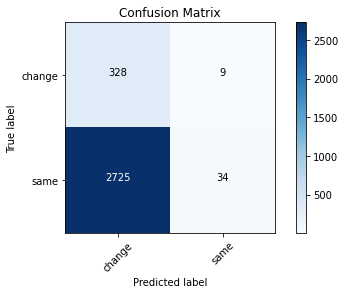

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels, y_pred=test_pred_labels_with_threshold)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ['change','same']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')